# Introduction to regression and classification

## Importing libraries
Python is good because it has many open source libraries that help us do many of the most common tasks without having to implements algorithms and data structures ourselves. The following are the main packages we usually use. There is a missing one that is useful but we don't need now: `SciPy`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear regression
Let's assume we have M datapoints $(x_1, y_1), \ldots, (x_M, y_M)$, where each $x_i$ is a continuous input variable (also called "feature") and $y_i$ is a corresponding output variable (also called "target variable"). Linear regression consists in obtaining the best straight line to the datapoints, i.e. we assume that for each sample $(x_i, y_i)$ the input and output are related by

$$
y_i = m\,x_i + q.
$$

The expression that relates $x_i$ and $y_i$ contains the parameters $m$ and $q$, and obtaining the best straight line means finding the optimal values for the parameters given the data. To do so, maximize the Likelihood (the probablility for the values of the parameters given the data) within respect to the values of the parameters themselves. Assuming uniform probability distribution of the parameters and that the datapoints have a Gaussian distribution centered on the straight line above, the optimal values for the parameters are found minimizing the Mean Square Error,

$$
MSE(m, q) \equiv \frac{1}{2 M} \sum_{i=1}^M \left(y_i - (m\,x_i + q) \right)^2.
$$

Generate the data.

In [57]:
X = 50.0*np.random.random(size=100) - 10.0

Y = np.random.normal(loc=1.25*X + 3.3, scale=2.0)

Plot the data.

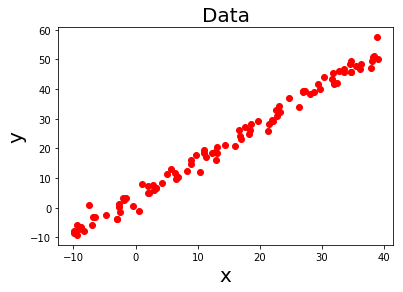

In [58]:
plt.scatter(X, Y, color='r')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Data', fontsize=20)

plt.show()

Let's define a function returning the MSE given the data. Remember that the MSE is a function of the parameters $m$ and $q$: here the data is thought of as given.

In [180]:
def mse(params):
    """
    INPUT: list or 1D array of parameters. First entry is m,
           second entry is q.
           
    RETURNS: mean square error computed on the dataset, given
             the cvalues for the parameters from the input.
    """
    v = (Y - (params[0]*X + params[1]))**2
    
    v = v.sum()/(2.0*len(X))
    
    return v

Let's plot the 3D surface given by
$$
z = MSE(m, q),
$$
for $m$ and $q$ ranging in some intervals.

In [156]:
from mpl_toolkits.mplot3d import Axes3D

In [157]:
ms, qs = np.meshgrid(np.linspace(-2., 2., 100), np.linspace(1., 5., 100))

In [172]:
mses = np.array([mse([m, q]) for m, q in zip(np.ravel(ms), np.ravel(qs))])

mses = mses.reshape(ms.shape)

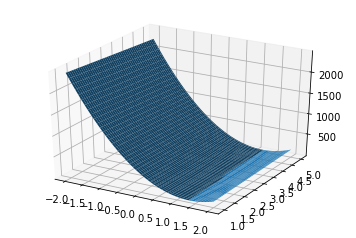

In [173]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(ms, qs, mses)

plt.show()

Let's import a minimization algorithm (in the form of a Python class) from the `sklearn` machine learning library.

In [160]:
from scipy.optimize import minimize

The `minimize` function wants as the input the function it has to minimize and an initial guess for the values of the vaiables on which to minimize it (in our case, the parameters $m$ and $q$). We can also specify a minimization method (the specific algorithm to be used): if we don't say anything the defaulf one is BFGS. Some methods require the gradient of the function to be specified, but since we can't be bothered conputing it we choose the Nelder-Mead method, which does not require anything but the function to minimize.

In [178]:
m_guess = 0.0
q_guess = 0.0

guesses = [m_guess, q_guess]

res = minimize(mse, guesses, method='Nelder-Mead')

`minimize` returns a Python class in which the results of the minimization procedure are stored. In particular, the value of the variables that minimize the function are stored in the `x` attribute of the class.

In [179]:
res.x

array([ 1.24541311,  3.56193308])

Let's compute the MSE on the optimized value for $m$ and $q$.

In [182]:
mse(res.x)

2.0011569483802738

Finally, let's plot the line we found and the data to see whether there is a qualitative agreement.

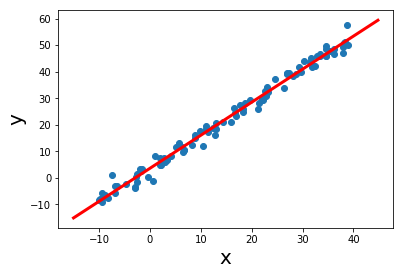

In [210]:
X_line = np.arange(-15., 45., 0.2)
Y_line = res.x[0]*X_line + res.x[1]

plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='r', linewidth=3)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

plt.show()

## Linear regression using `sklearn`
Importing having to define the MSE and minimizing it with the algorithm from the `scipy` library is not difficult, but if we want to do a linear regression the `sklearn` library offers us a built-in standardized way that's even easier.

Import the linear regression model from `sklearn`.

In [211]:
from sklearn.linear_model import LinearRegression

Let's introduce the default syntax for the machine learning models in `sklearn` (notice that linear regression tunes the parameters of a model on some given data, and therefore **IS** a machine learning algorithm!).

A machine learning model imported from `sklearn` is a Python class, so the first thing to do is to instantiate an object belonging to that class. Example: if we define the class `Human`, we define a general object, but no human is declared yet. If we then say `ema = Human()`, we are instantiating an object whose class is `Human`, and indeed we have such an object at our disposal.

In [212]:
linreg = LinearRegression()

Now we work with the attributes (variables) and methods (functions) inside the `LinearRegression` instance `linreg`.

There are two main methods inside all of the `sklearn` models: `fit` and `predict`.

- `fit` does the learning: it has the training data (the samples for which both the input and the output is known, as in the pairs $(x_i, y_i)$) as the input and it tunes the parameters to best fit it.

- `predict` is the one that predicts new the output of new data for which only the features are known. We haven't seen this previously, but most of the times we are not interested in the parameters of the model that best fit some data: what we want is to set the parameter to the optimized value and then use the model to make predictions on new, previously unseen data. We'll see an example below.

Fit the model to the training data.

In [218]:
linreg.fit(X, Y)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 100]

Something went wrong! This has to do with the shape of the arrays `X` and `Y` in which we are storing the training data. In a nutshell, the latest version of `sklearn` wants the data to be put into arrays with shape (n_samples, n_features), so in our case we it would be arrays of shape (100, 1). The problem is that we defined `X` and `Y` as arrays of shape (100) (the number of components is of course the same).

To solve the problem we have to reshape the arrays calling the `reshape` method of the arrays themselves (notice that this doesn't permanently change the shape of the original array!).

In [221]:
X.shape, X.reshape(-1,1).shape

((100,), (100, 1))

If we pass the reshaped arrays to the `fit` method of `linreg` it doesn't complain anymore.

In [222]:
linreg.fit(X.reshape(-1,1), Y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The values of the parameters are stored in the `coef_` and `intercept_` attributes of `linreg`.

In [223]:
linreg.coef_, linreg.intercept_

(array([[ 1.24541517]]), array([ 3.56189554]))

Let's define a new dataset for whose samples we only know the vaues of the features (the $x_i$) and let's use our trained model to find the corresponding output.

Generate new samples (features only).

In [227]:
X_new = (20.0*np.random.random(20) + 60.0).reshape(-1,1)

Predict the output values for the new samples using the trained linear model.

In [228]:
Y_predicted = linreg.predict(X_new)

Plot everything!

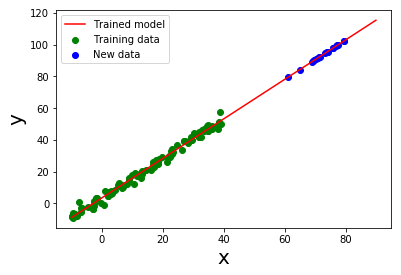

In [356]:
X_line = np.arange(-10.0, 90.0, 0.2)
Y_line = linreg.coef_[0,0]*X_line + linreg.intercept_

plt.scatter(X, Y, color='g', label='Training data')
plt.scatter(X_new, Y_predicted, color='b', label='New data')
plt.plot(X_line, Y_line, color='r', label='Trained model')

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend()

plt.show()

## Classification: logistic regression

Classification is not that different from regression apart from the fact that the output variables are "categorical" (i.e. assume discrete values, called "class labels"). In the following we will use a method called __logistic regression__, which we train on some data and use to predict the labels of new data. Although the name says "regression", this model is a classifier (the reason for the misnomen is that it is very similar to a regression task).

Load a dataset for classification.

`sklearn` contains various datasets that can be used to test different methods: here we will use part of the iris dataset, containing 4 features for 150 samples of 3 different categories of iris flowers (50 samples for each category).

In this case a datapoint is in the form $(\mathbf{x}_i, y_i)$, where $\mathbf{x}_i = (x_i^1, x_i^2, x_i^3, x_i^4)$ is a 4-component vector containing the values of the features of the $i$-th sample.

To simplify things further, we only use two classes of flowers, for a total of 100 samples, and only one feature (the one that best distinguishes between the two chosen classes), so we go back to having datapoints with the structure $(x_i, y_i)$, where $x_i$ is a scalar.

In [249]:
from sklearn.datasets import load_iris

In [265]:
X_class = load_iris().data[:100,2]
Y_class = load_iris().target[:100]

Let's plot the class label (0 or 1) against the single feature we have for each of the sample.

The feature we chose already distinguishes well between the two classes.

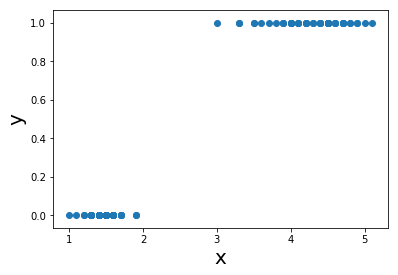

In [267]:
plt.scatter(X_class, Y_class)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

plt.show()

To make things more interesting, we split the samples (both the feature array X and the target array Y) between a training dataset on which we train the model and a test dataset on which we test its accuracy.

In [270]:
X_class_train = np.concatenate((X_class[:40], X_class[50:90]))
Y_class_train = np.concatenate((Y_class[:40], Y_class[50:90]))

X_class_test = np.concatenate((X_class[40:50], X_class[90:100]))
Y_class_test = np.concatenate((Y_class[40:50], Y_class[90:100]))

We start by doing things by hand: we proceed as in the regression case, but now the function we want to fit to the data is not a straight line, but rather the composition of a straight line
$$
F(x) = m\,x + q
$$
with a sigmoid function
$$
G(x) = \frac{1}{1+e^{-x}}.
$$

In total we fit the function
$$
y = G(F(x)) = G(m\,x + q) = \frac{1}{1+e^{-(m\,x+q)}}.
$$

The parameters we want to optimize are again $m$ and $q$.

We may ask why such a function. One reason is that if we plot the function above we see that it (potentially) interpolates well the plot of the data we had before. The other is more subtle: given a value $x_i$ we interpret $G(F(x_i))$ as the probability of the $i$-th sample to belong to class $y_i=1$,
$$
P(y_i = 1) = \frac{1}{1+e^{-(m\,x_i+q)}}.
$$
$G$ is just a function that takes a straight line ($F$) as the input and "squashes" it between 0 and 1, which is right what we need if we want to interpret the output as a probability.

Notice that this only gives the reason $G$ why must be a sigmoid function, but it poses no constraints on $F$: indeed we take $F$ to be linear just because it's the simplest thing we can do, but a priori we might use any form for $F$.

Define the linear function, the sigmoid function and the appropriate mean square error computed on the training data using the composition of the two functions.

In [306]:
from scipy import exp

def sigmoid_function(x):
    return 1.0 / (1.0 + exp(-x))

def linear_function(x, m, q):
    return m*x + q

def mse_logit(params):
    v = (Y_class_train - sigmoid_function(linear_function(X_class_train, params[0], params[1])))**2
    
    v = v.sum()/(2.0*len(X_class_train))
    
    return v

Minimize the MSE using the `minimize` function in `scipy`.

In [311]:
res_class = minimize(mse_logit, [1.0, 1.0])

In [312]:
res_class.x

array([  6.82432071, -18.27802092])

Let's plot the training data and the trained model, which in this case is just the logistic function with the parameters for the straight line set to the optimal values given by `minimize`.

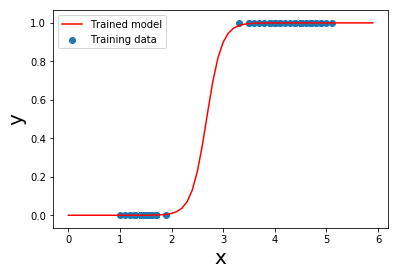

In [355]:
X_sigmoid = np.arange(0.0, 6.0, 0.1)

plt.scatter(X_class_train, Y_class_train, label='Training data')
plt.plot(X_sigmoid, sigmoid_function(linear_function(X_sigmoid, res_class.x[0], res_class.x[1])), color='r', label='Trained model')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend()

plt.show()

It's clearer is we define the trained model as a function of its own. The trained model is nothing but a the composition of a straight line and a sigmoid function that takes the value of the feature of a sample as the input and computes the probability for the sample to belong to class 1.

In [320]:
def trained_sigmoid(x):
    return sigmoid_function(linear_function(x, res_class.x[0], res_class.x[1]))

If we want to go from computing class probabilities to predicting class labels (0 or 1), we just follow the simple rule

$$
\left\lbrace\begin{array}{l}
\text{If}\,\,P(x) < 0.5\,\,\text{then}\,\,y = 0\\
\text{If}\,\,P(x) \geq 0.5\,\,\text{then}\,\,y = 1
\end{array}\right.
$$

This can be done by passing the output of the trained model through a quantizer function.

In [343]:
def quantizer(p):
    """
    INPUT: array of the samples' probabilities, with len(p)=n_samples.
    
    RETURNS: array of labels (0 or 1)
    """
    return (p>=0.5).astype(int)

Let's see how we perform on the training data.

Compute the label of the training samples. We know these labels already and we used them to train the model. If the model is not too rigid (simple) we expect it to perform well on the training data (to the point of risking overfitting).

In [344]:
quantizer(trained_sigmoid(X_class_train))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In order to quantify the performance of the trained model, we can use accuracy, defined as

$$
\text{Accuracy} = \frac{\text{Number of samples correctly labelled}}{\text{Total number of samples}}.
$$

In [348]:
def accuracy(y_true, y_pred):
    return (y_true==y_pred).sum()/len(y_true)

In [349]:
accuracy(Y_class_train, quantizer(trained_sigmoid(X_class_train)))

1.0

The model correctly labels 100% of the training data. It's too early to be happy, as we may be overfitting the training dataset: the real performance of a model is evaluated only on the test dataset.

Now we have the trained model, predicting the class labels for the test data is easy: we just compute the probability giving the features of the test samples as the input, and then we quantize them to obtain class labels. We can go further and direclty compute the accuracy on the test set.

In [350]:
accuracy(Y_class_test, quantizer(trained_sigmoid(X_class_test)))

1.0

Now we call this a success! 100% of the test datapoints have been labelled correctly by our logistic regression model.

Let's plot everything.

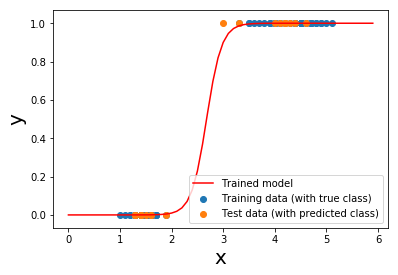

In [357]:
plt.scatter(X_class_train, Y_class_train, label='Training data (with true class)')
plt.scatter(X_class_test, quantizer(trained_sigmoid(X_class_test)), label='Test data (with predicted class)')
plt.plot(X_sigmoid, sigmoid_function(linear_function(X_sigmoid, res_class.x[0], res_class.x[1])), color='r', label='Trained model')

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend()

plt.show()